# Learning Git - Chapter 3
*Andreas Møgelmose, anmo@create.aau.dk, 2020*

This is a tutorial which teaches you the basics of Git. This is chapter 3, so be sure you have gone through at least [chapter 1](LearningGit-Chapter1.ipynb) before you start this one. [Chapter 2](LearningGit-Chapter2.ipynb) is also a good idea, but it is not a strict requirement for this chapter.

Note that all the command samples in this chapter assume you have run the commands in chapter 1. They won't work if you have not created a repo yet (see [chapter 1](LearningGit-Chapter1.ipynb) for the details about that).

## Contents of this tutorial
This tutorial is split into 3 chapters with one notebook file per chapter. Here's the lowdown:

1. [Git basics](./LearningGit-Chapter1.ipynb)
2. [Git with a server (and friends!)](./LearningGit-Chapter2.ipynb)
3. **Advanced Git'ing - branching and pointers to more advanced topics** (this chapter)

### Housekeeping
Just making sure that this chapter works with the repo we created in chapter 1:

In [24]:
$pwd = pwd; While ($pwd.ToString().Trim() -match 'aNewProject$') {cd ..; $pwd = pwd}
cd aNewProject

# Advanced Git'ing - branching
One of the really cool things about Git is that it allows branching. This allows you to work on several things in parallel, without breaking the main build. A branch is a separate place in which you can store all changesets related to, say, a particular feature. Then when you are done, your *feature branch* will contain many commits, which together comprise your new feature. The feature branch can then be merged into your *master branch*.

I always do my work on a separate branch. If I'm working on several things, I'll have a branch for each. This way I can always jump back to the master branch if I need to check something from before I started my new thing. This is especially useful if you're in the middle of coding something which won't even compile yet, and a colleague comes and asks you about something which requires you to run the software - then you simply jump to the master branch and compile. It takes two seconds to do. Let's jump in.

## Making and switching between branches

First we need to know what branch we are currently in. Let's just ask `git status`:

In [3]:
git status

On branch master
Your branch is up to date with 'origin/master'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


The very first line tells us that we're in the master branch. Duh, of course, we did not make any other branches yet! Let's make a branch for our new awesome feature and switch over to it:

In [4]:
git branch newAwesomeFeature
git checkout newAwesomeFeature

M	hello.py
Switched to branch 'newAwesomeFeature'


Now we just took a snapshot of newAwesomeFeature, which is an exact copy of master. And then we moved to that branch. Let's see if `git status` can confirm that:

In [5]:
git status

On branch newAwesomeFeature
Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   hello.py

no changes added to commit (use "git add" and/or "git commit -a")


Going back to the master branch is very simple:

In [6]:
git checkout master

M	hello.py
Your branch is up to date with 'origin/master'.
Switched to branch 'master'


It is always good to give your new brances a descriptive name. "CameraCalibrationFeature" is better than "asdf". If at any point your're in doubt about what branches you have, just ask Git:

In [7]:
git branch -a

* master
  newAwesomeFeature
  remotes/origin/master


remotes/origin/master refers to the repo we just created online on Bitbucket. If you go up and look at where we first pushed something to that, Git told us that `Branch 'master' set up to track remote branch 'master' from 'origin'.` This means that our local master branch is the one connected to the master branch on Bitbucket. A consequence of this is that when we pull new changes from Bitbucket, they are only applied to the local master branch. This is exactly what we want: If I'm implementing a new and complex and awesome feature in my local newAwesomeFeature branch, the last thing I want is for Henrik Hardcoder's newest changes to come and disturb me there. I'll merge them in when I'm ready.

## Saving your changes to a branch

All right. Until now we have only created our new branch. Let's start using it. To use it, we first need to switch to it:

In [8]:
git checkout newAwesomeFeature

M	hello.py
Switched to branch 'newAwesomeFeature'


Then we make some changes:

In [9]:
cp ..\resources\hello5.py hello.py
cat hello.py

print("Hello World");
print("... and hello Mark!");

def myAwesomeFunction():
    print("This function is awesome!)


All right. Our new, awesome feature is done. To save it to the current branch, we simply add and commit as usual:

In [10]:
git add hello.py
git commit -m "Awesome new feature implemented."

[newAwesomeFeature 906ac27] Awesome new feature implemented.
 1 file changed, 4 insertions(+), 1 deletion(-)


Now our changes have been saved, as `git status` will tell us:

In [11]:
git status

On branch newAwesomeFeature
nothing to commit, working tree clean


And as expected, hello.py still contains our new feature:

In [12]:
cat hello.py

print("Hello World");
print("... and hello Mark!");

def myAwesomeFunction():
    print("This function is awesome!)


But what happens if we change to the master branch?

In [13]:
git checkout master

Your branch is up to date with 'origin/master'.
Switched to branch 'master'


In [14]:
cat hello.py

print("Hello World");
print("... and hello Mark!");


Now hello.py looks exactly like it used to! How come? This is because our new feature only lives in the branch it has been committed to. Don't worry, our changes are not lost, we simply have to go back to the branch that contains them:

In [15]:
git checkout newAwesomeFeature

Switched to branch 'newAwesomeFeature'


In [16]:
cat hello.py

print("Hello World");
print("... and hello Mark!");

def myAwesomeFunction():
    print("This function is awesome!)


And our new feature is back!

But uh oh, there is another bug! A missing string delimiter. Let's fix it and commit the bugfix:

In [17]:
cp ..\resources\hello6.py hello.py
git add hello.py
git commit -m "Fix missing string delimiter leading to exception."

[newAwesomeFeature 62ec2ac] Fix missing string delimiter leading to exception.
 1 file changed, 1 insertion(+), 1 deletion(-)


So now we have two changes in the newAwesomeFeature branch, which exist nowhere else. Usually when I develop a new feature I will have 5 or 10 or 50 commits in the branch before I'm done.

## Rebasing - getting changes from master into your feature branches
What happens if I or somebody else make some changes in the master branch while I am working in my feature branch? Well, nothing. The things take place in two completely different branches. My new feature changes will stay in their branch and other changes will stay in their branches.

But sometimes it would be nice to be able to pull in the newest changes from master to my feature branch. Perhaps Henrik Hardcoder has made a new library function I can use. `rebase` can help with that. Let's try it. First we go to master and make some changes there:

In [18]:
git checkout master
cp ..\resources\rng.py rng.py
git add rng.py
git commit -m "Add random number generator."

Your branch is up to date with 'origin/master'.
Switched to branch 'master'
[master b6b07cd] Add random number generator.
 1 file changed, 2 insertions(+)
 create mode 100644 rng.py


And now rng.py in the master branch looks like this:

In [19]:
cat rng.py

def henrikHardcodersRandomNumberGenerator():
    return 4 # Chosen by fair dice roll. Guaranteed to be random.


rng.py does not exist in newAwesomeFeature. So at this point we have two changes which exist only in the newAwesomeFeature branch, and one change which exists only in the master branch. That looks like this (screenshot from Sublime Merge):


Starting from the bottom, we see a few features in the master branch. Then newAwesomeFeature is branched out from the "Add a welcome message"-commit, and two changes is committed to that branch. Finally, our newest change exists only in master.

But maybe we need that random number generator in newAwesome feature. How can we get access to it? As it is now, newAwesomeFeature is branching off from "Add a welcome message". We might say that it is *based* on "Add a welcome message". So to get the newest into newAwesomeFeature, one solution is to move the branch so it is based on "Add random number" instead. This is called *rebasing* and is done with the command `git rebase`.

Let's try to rebase newAwesomeFeature. First we need to go to the branch we want to rebase - this is logical, because after all, that is the branch we want to change:

In [20]:
git checkout newAwesomeFeature

Switched to branch 'newAwesomeFeature'


And then we rebase it onto master. This means that we rebase it onto the newest changeset in master. That is what you want 99% of the time:

In [21]:
git rebase master

First, rewinding head to replay your work on top of it...
Applying: Awesome new feature implemented.
Applying: Fix missing string delimiter leading to exception.


And now the project looks like this:


At first glance it looks like we only have one branch left - but that is not the case, look to the right. The master branch ends at "Add random number", and newAwesomeFeature builds directly on top of that. That means of course that all changes which exist in master, also exist in newAwesomeFeature. As soon as we add something new to master, our commit graph will show the branching "railroad" we saw before, because then the two branches will diverge.

When rebasing, one might experience merge conflicts. After all, the new changes in master may conflict with the changes in your branch. Then you just go to Sublime Merge to resolve the conflict.

## Merging - ending branches when your feature is done

All this is fine. Now we know how to build new features in their own branch to keep the sawdust out of master, and we know how to pull new changes in from master. But what do we do when our feature is done? We need to first merge the branch into master, and then delete the branch. To make the merge easier, it's best if we do a rebase of master into our branch first. That way, any merge conflicts are contained in the branch until we solve them. So this is the process:

1. Rebase your feature branch onto master (and resolve any conflicts)
1. Merge your feature branch into master (this is now guaranteed to be conflict-free)
1. Delete your feature branch.

Let us do this for newAwesomeFeature. We'll skip step one, because we just did a rebase in the previous section. We don't need to do it again, because no new changes have been added to master. Step two is to merge. We do that from master:

In [22]:
git checkout master
git merge newAwesomeFeature

Your branch is ahead of 'origin/master' by 1 commit.
  (use "git push" to publish your local commits)
Switched to branch 'master'
Updating b6b07cd..4a2488e
Fast-forward
 hello.py | 5 ++++-
 1 file changed, 4 insertions(+), 1 deletion(-)


A keyword here is fast-forward. Because we did the rebase first, the merge can be processed as a conflict-free fast-forward merge. Now our repository looks like this:


We see that *master* and *newAwesomeFeature* both point to the same commit. Now all we need to do is delete the newAwesomeFeature branch:

In [23]:
git branch -d newAwesomeFeature

Deleted branch newAwesomeFeature (was 4a2488e).


Of course you should always be careful not to delete branches which have not been merged into another branch - then the data for that branch will be difficult to find again (the data does not actually disappear instantly, but since there is no longer anything pointing to it, it is kind of "lost"). Fortunately, Git will warn you if you try to delete a branch which has not been merged anywhere else.

## Other things to consider about branching
That was pretty easy. In Git branches are so cheap and quick, you can easily make new branches all the time. This is contrary to many older VCSs where branches were much more difficult to work with. As you get into Git, you may stumble upon all sorts of project-wide branching strategies. That is, rules and systems for how to structure your branches. [Git flow](https://nvie.com/posts/a-successful-git-branching-model/) is a well known and much used example. That model makes use of multiple branches in the online repo, as well as locally. It is important to understand that none of these strategies are built into Git. Git allows any model that you can imagine, including just not using branches at all.

My advice is to not overdo it. There is nothing more tempting when starting a new project than to decide "we'll do git flow!" or some other advanced model. You probably shouldn't. Stick to having a master branch and then creating small local feature branches.

There are also multiple ways of combining merge and rebase. The way I have shown here (rebase first, then merge) is the one I like, but it is for example possible to merge directly. There is not necessarily a correct way. Do what works for you. And if you're in doubt, do what I have described. It is a good flow.

## Branching summary
Branching is easy!

* Use `git branch` to create a new branch.
* Switch to the branch with `git checkout`
* Do all your normal Git-things within the branch.
* Pull in changes from the outside with `git rebase`
* Merge your branch back to master with `git merge`

## Exercise
* Create a new branch. Make some changes. Commit them to the new branch.
* Make other changes and commit them to master.
* Rebase the new branch onto the newest commit in master.
* Commit other changes in your new branch.
* Make changes *in the same line of the same file* in master.
* Try to rebase again. Resolve the conflict using Sublime Merge.

# Other cool stuff Git can do
That's it for this tutorial! Congratulations, now you know more about Git than most people! (okay, most people have no clue what Git is and what you would use it for, so that's a low bar)

I'll end with a few pointer to other cool stuff Git can do, which you can read up on yourself:

* [Git aliases](https://git-scm.com/book/en/v2/Git-Basics-Git-Aliases): Typing `git st` is so much easier than `git status`. Save your fingertips and set up som aliases!
* [Undoing things](https://git-scm.com/book/en/v2/Git-Basics-Undoing-Things): Git has good support for fixing that typo you just made in your commit message. Or adding that file you missed.
* [Squashing commits](https://git-scm.com/book/en/v2/Git-Tools-Rewriting-History): Remember those atomic commits? Well, small commits are great, but sometimes you make them just a bit too small and want to combine two or more into a single commit after the fact. Git can do that.
* [Git bisect](https://git-scm.com/book/en/v2/Git-Tools-Debugging-with-Git): This is reeeeeeally cool, even though you'll use it very rarely. What do you do if you have a bug, that you know was introduced at some point, but don't know where to look for it? If you know just one commit in the past where your code worked, `git bisect` can help you find the exact point where the bug was created. You can even script it, so Git will automatically tell you where the bug comes from. You only need to supply a known good commit and known bad commit.
* [Going back in time](https://git-scm.com/book/en/v2/Git-Tools-Reset-Demystified): Sometimes you just want to scrap what you just made and go back to something that works. `git reset` will help you do that.

Other than that, I will reiterate my recommendation of reading *[Pro Git](https://git-scm.com/book/en/v2)*. It is a relatively quick read, and you'll learn a lot from it, especially after you gain a little experience with Git.

Thanks for reading and have fun version controlling all the things!

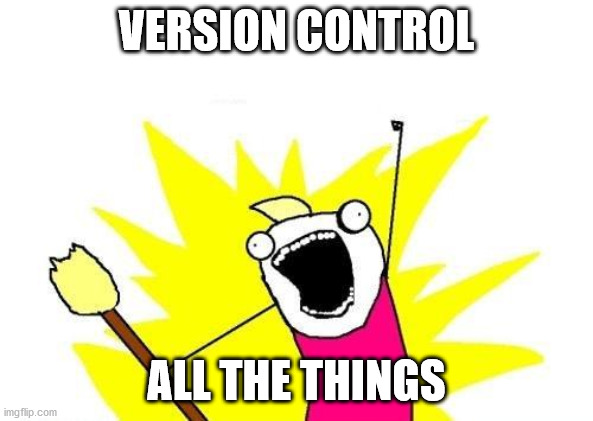